In [1]:
import dynamiqs as dq
import numpy as np
import jax.numpy as jnp
from pathlib import Path
import pickle
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Read files 

we put the state files in data/synthetical/states and the noisy in: data/synthetical/states

In [2]:
# Define folder path
folder = Path("data/synthetic/state")

# Find all .pkl or .pickle files in the folder
pkl_files = list(folder.glob("*.pkl")) + list(folder.glob("*.pickle"))

# Load all pickle files into a list
data_objects_states = []
file_names_states = []
for file in pkl_files:
    with open(file, "rb") as f:
        obj = pickle.load(f)
        data_objects_states.append(obj)
        file_names_states.append(file.name)

# Optional: print how many and what type of objects you loaded
print(f"Loaded {len(data_objects_states)} pickle files.")
print(f"Types: {[type(obj) for obj in data_objects_states]}")
print(f"Filenames: {file_names_states}")


folder = Path("data/synthetic/noisy")

# Find all .pkl or .pickle files in the folder
pkl_files = list(folder.glob("*.pkl")) + list(folder.glob("*.pickle"))

# Load all pickle files and store filenames
data_objects_noisy = []
file_names_noisy = []

for file in pkl_files:
    with open(file, "rb") as f:
        obj = pickle.load(f)
        data_objects_noisy.append(obj)
        file_names_noisy.append(file.name)  # Store just the filename

# Optional: print summary
print(f"Loaded {len(data_objects_noisy)} pickle files.")
print(f"Types: {[type(obj) for obj in data_objects_noisy]}")
print(f"Filenames: {file_names_noisy}")


folder = Path("data/experimental")

# Find all .pkl or .pickle files in the folder
pkl_files = list(folder.glob("*.pkl")) + list(folder.glob("*.pickle"))

# Load all pickle files into a list
data_objects_experimental = []
file_names_experimental = []
for file in pkl_files:
    with open(file, "rb") as f:
        obj = pickle.load(f)
        data_objects_experimental.append(obj)
        file_names_experimental.append(file.name)

# Optional: print how many and what type of objects you loaded
print(f"Loaded {len(data_objects_experimental)} pickle files.")
print(f"Types: {[type(obj) for obj in data_objects_experimental]}")
print(f"Filenames: {file_names_experimental}")

order_states = [6,2,7,3,5,1,4,0]
order_noisy = [9,0,11,2,14,6,12,5,15,7,3,10,1,8,4,13]
order_experimental = [0,1,2,3,4,5,6]

data_objects_states = [data_objects_states[i] for i in order_states]
file_names_states = [file_names_states[i] for i in order_states]

data_objects_noisy = [data_objects_noisy[i] for i in order_noisy]
file_names_noisy = [file_names_noisy[i] for i in order_noisy]

data_objects_experimental = [data_objects_experimental[i] for i in order_experimental]
file_names_experimental = [file_names_experimental[i] for i in order_experimental]

wigner = []
for _ in range(len(data_objects_states)):
    wigner.append(dq.wigner(data_objects_states[_],npixels=1000))
states = data_objects_states


Loaded 8 pickle files.
Types: [<class 'jaxlib.xla_extension.ArrayImpl'>, <class 'jaxlib.xla_extension.ArrayImpl'>, <class 'jaxlib.xla_extension.ArrayImpl'>, <class 'jaxlib.xla_extension.ArrayImpl'>, <class 'jaxlib.xla_extension.ArrayImpl'>, <class 'jaxlib.xla_extension.ArrayImpl'>, <class 'jaxlib.xla_extension.ArrayImpl'>, <class 'jaxlib.xla_extension.ArrayImpl'>]
Filenames: ['quantum_state_7.pickle', 'quantum_state_5.pickle', 'quantum_state_1.pickle', 'quantum_state_3.pickle', 'quantum_state_6.pickle', 'quantum_state_4.pickle', 'quantum_state_0.pickle', 'quantum_state_2.pickle']
Loaded 16 pickle files.
Types: [<class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>]
Filenames: ['noisy_wigner_1.pickle', 'noisy_wigner_12.pickle', 'noisy_wigner_3.pickle', 'noisy_wigner_10.pick

In [13]:
def corrected(idx,dataset,sigma):
    X ,Y,Z = dataset[idx]
    Z = Z.T
    dx, dy = X[1] - X[0], Y[1] - Y[0]

    z1 = Z[0,:]
    z2 = Z[-1,:]
    z3 = Z[:,0][1:-1]
    z4 = Z[:,-1][1:-1]

    z1 = z1[~np.isnan(z1)]
    z2 = z2[~np.isnan(z2)]
    z3 = z3[~np.isnan(z3)]
    z4 = z4[~np.isnan(z4)]
    
    bias = np.mean([z1,z2,z3,z4][0])

    Z1 = Z-bias
    Z1 = np.nan_to_num(Z1)

    norm = np.sum(Z1) *dy*dx
    Z2 = Z1/np.abs(norm)
    
    
    

    return X, Y, Z2


## Denoiser Function

In [3]:
def denoise(idx,dataset,sigma,returnPlots=False):
    X,Y,Z = dataset[idx]
    #Z=Z.T

    dx, dy = X[1] - X[0], Y[1] - Y[0] 

    



    z1 = Z[0, :]                        
    z2 = Z[-1, :]                        
    z3 = Z[1:-1, 0]                      
    z4 = Z[1:-1, 1]                    


    z1 = z1[~np.isnan(z1)]
    z2 = z2[~np.isnan(z2)]
    z3 = z3[~np.isnan(z3)]
    z4 = z4[~np.isnan(z4)]


    all_edges = np.concatenate([z1, z2, z3, z4])


    bias = np.mean(all_edges)


    Z1 = Z-bias
    Z1 = np.nan_to_num(Z1)

    norm = np.sum(Z1) *dy*dx
    Z2 = Z1/np.abs(norm)
    
    
    
   
    W = Z2
    


    W_smooth = gaussian_filter(W, sigma=sigma)


    if returnPlots==True:

        X4,Y4,Z4 = wigner[idx]

        vmax1 = np.max(np.abs(Z))
        vmax2 = np.max(np.abs(Z2))
        vmax3 = np.max(np.abs(W_smooth))
        vmax4 = 2/np.pi 

        vmax = 2/np.pi
        

        fig, (ax1, ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20,4))
        im1 = ax1.imshow(Z, origin='lower', aspect='auto', 
                        extent=[Y.min(), Y.max(), X.min(), X.max()],cmap='RdBu_r', vmin=-vmax1, vmax=vmax1)
        ax1.set_title("Original Wigner "+file_names_noisy[idx])
        fig.colorbar(im1, ax=ax1)

        im2 = ax2.imshow(Z2, origin='lower', aspect='auto',
                        extent=[Y.min(), Y.max(), X.min(), X.max()],cmap='RdBu_r', vmin=-vmax2, vmax=vmax2)
        ax2.set_title("Corrected Wigner")
        fig.colorbar(im2, ax=ax2)

        im3 = ax3.imshow(W_smooth, origin='lower', aspect='auto',
                        extent=[Y.min(), Y.max(), X.min(), X.max()],cmap='RdBu_r', vmin=-vmax3, vmax=vmax3)
        ax3.set_title("Smoothed Wigner")
        fig.colorbar(im3, ax=ax3)

        im4 = ax4.imshow(Z4, origin='lower', aspect='auto',
                        extent=[Y4.min(), Y4.max(), X4.min(), X4.max()],cmap='RdBu_r', vmin=-vmax4, vmax=vmax4)
        ax4.set_title("Original State")
        fig.colorbar(im4, ax=ax4)

        plt.tight_layout()
        plt.show()
        
    return X, Y, W_smooth


## Solver Function 

In [4]:
def rho(idx,dataset,num_samples,dim_povm,dim_trunc,idx_state,returnplot=False):

   x_coarse_list = []
   y_coarse_list = []
   W_coarse_list = []
   alpha_sample_list = []

   for x_vec, y_vec, W in dataset:
      valid_indices = np.logical_and(np.isfinite(W), np.abs(W) > 0.05*np.max(np.abs(W)))

      valid_x_indices, valid_y_indices = np.where(valid_indices)


      if len(valid_x_indices) < num_samples:
         raise ValueError(f"Not enough valid points in W for sampling. Found {len(valid_x_indices)} valid points.")

      sampled_indices = np.random.choice(len(valid_x_indices), size=num_samples, replace=False)


      x_coarse = x_vec[valid_x_indices[sampled_indices]]
      y_coarse = y_vec[valid_y_indices[sampled_indices]]
      W_coarse = W[valid_x_indices[sampled_indices], valid_y_indices[sampled_indices]]


      alpha_sample = x_coarse + 1j * y_coarse  


      x_coarse_list.append(x_coarse)
      y_coarse_list.append(y_coarse)
      W_coarse_list.append(W_coarse)
      alpha_sample_list.append(alpha_sample)

   Wk = (W_coarse_list[idx]).reshape(-1)
   wk = 0.5*(1+np.pi/2*Wk)


   alpha = (alpha_sample_list[idx]).reshape(-1)

      
   dim_full = dim_povm + dim_trunc

 
   parity_full = dq.parity(dim_full)
   identity_full = dq.eye(dim_full, layout=dq.dense)
   D_alpha = dq.displace(dim_full, alpha)
   D_alpha_dag = dq.dag(D_alpha)

   displaced_parity = D_alpha @ parity_full @ D_alpha_dag
   povm_full = 0.5 * (identity_full + displaced_parity)

   povm_truncated_data = povm_full.data[:, :dim_povm, :dim_povm] 

  
   povm_np = povm_truncated_data
  
   rho = cp.Variable((dim_povm, dim_povm), hermitian=True)

  
   constraints = [rho >> 0, cp.trace(rho) == 1]

   
   wk_vec = np.array(wk)

   
   preds = cp.hstack([cp.real(cp.trace(P@rho)) for P in povm_np]) 

   objective = cp.Minimize(cp.sum_squares(preds - wk_vec))


   problem = cp.Problem(objective, constraints)
   problem.solve(solver=cp.SCS)


   rho_opt = rho.value

   X ,Y,Z = dataset[idx]
   if returnplot ==True:

      vmax1 = np.max(np.abs(Z))
      vmax2 = 2/np.pi
      vmax3 = 2/np.pi

      X1,Y1,Z1 = dq.wigner(rho_opt,npixels=1000)
      X3,Y3,Z3 = dq.wigner(states[idx_state],npixels=1000)

      fig, (ax1, ax2,ax3 ) = plt.subplots(1,3, figsize=(15,4))
      im1 = ax1.imshow(Z, origin='lower', aspect='auto', 
                        extent=[Y.min(), Y.max(), X.min(), X.max()],cmap='RdBu_r', vmin=-vmax1, vmax=vmax1)
      ax1.set_title("Smoothed Wigner "+file_names_noisy[idx])
      ax1.set_xlabel('p')
      ax1.set_ylabel('x')
      fig.colorbar(im1, ax=ax1,label='Wigner Value')
      
      im2 = ax2.imshow(Z1, origin='lower', aspect='auto',
                        extent=[Y1.min(), Y1.max(), X1.min(), X1.max()],cmap='RdBu_r', vmin=-vmax2, vmax=vmax2)
      ax2.set_title("Fitted Wigner")
      ax2.set_xlabel('p')
      ax2.set_ylabel('x')
      fig.colorbar(im2, ax=ax2,label='Wigner Value')
      
      im3 = ax3.imshow(Z3, origin='lower', aspect='auto', 
                        extent=[Y3.min(), Y3.max(), X3.min(), X3.max()],cmap='RdBu_r', vmin=-vmax3, vmax=vmax3)
      ax3.set_title("Underlying State "+file_names_states[idx])
      ax3.set_xlabel(r'$Im(\alpha)$')
      ax3.set_ylabel(r'$Re(\alpha)$')
      fig.colorbar(im3, ax=ax3,label='Wigner Value')

      plt.tight_layout()
      plt.show()




   return rho_opt

## Plot of the States

In [14]:
sigma = 5
dataset = data_objects_noisy

clean_dataset_noisy = []
for i in range((16)):
    clean_dataset_noisy.append(denoise(i, dataset, sigma))


corrected_dataset_noisy = []
for i in range((16)):
    corrected_dataset_noisy.append(corrected(i, dataset, sigma))

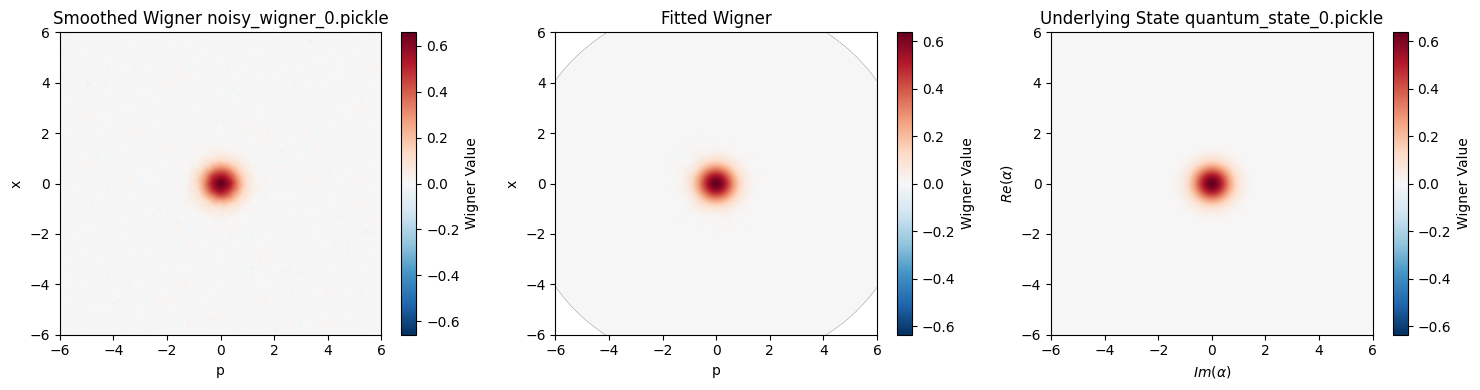

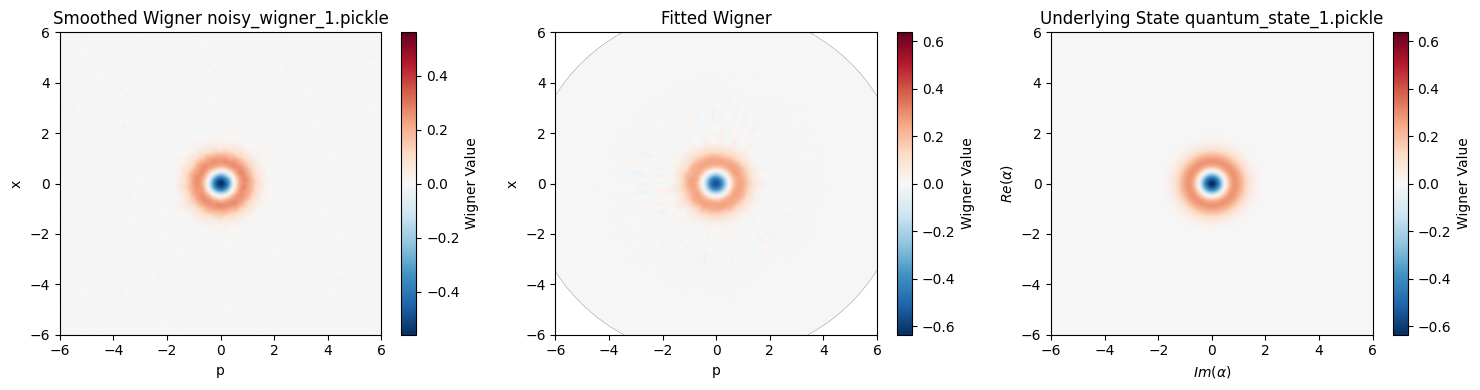

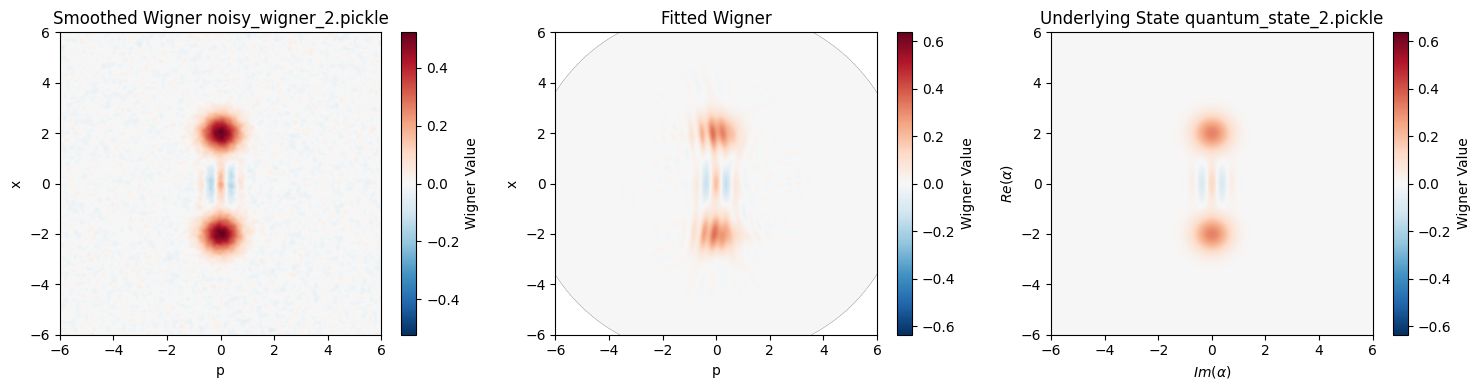

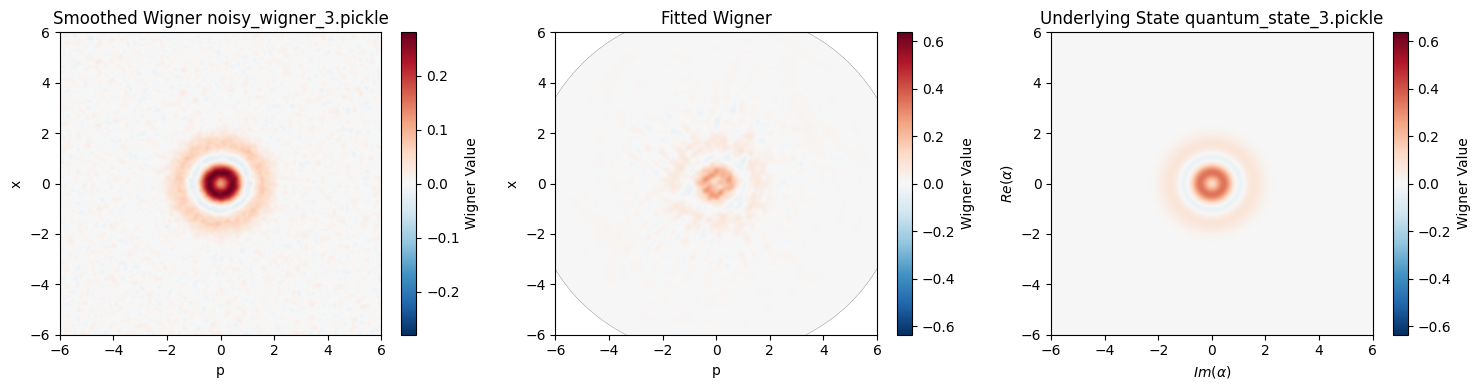

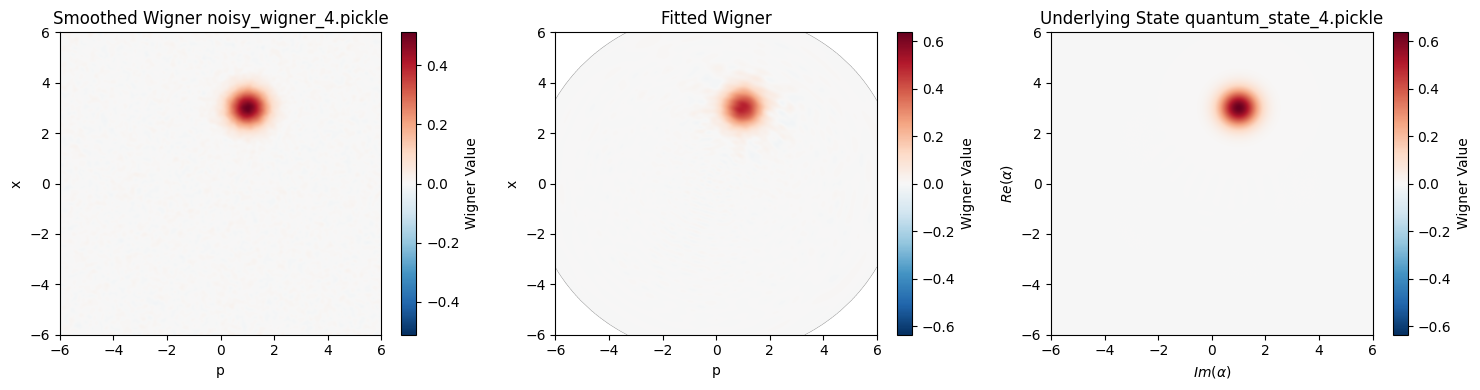

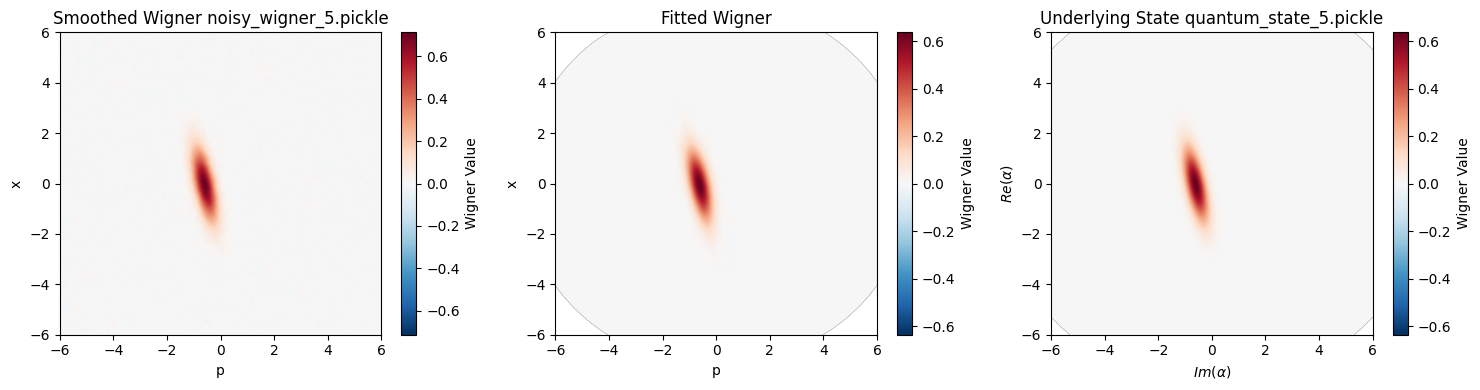

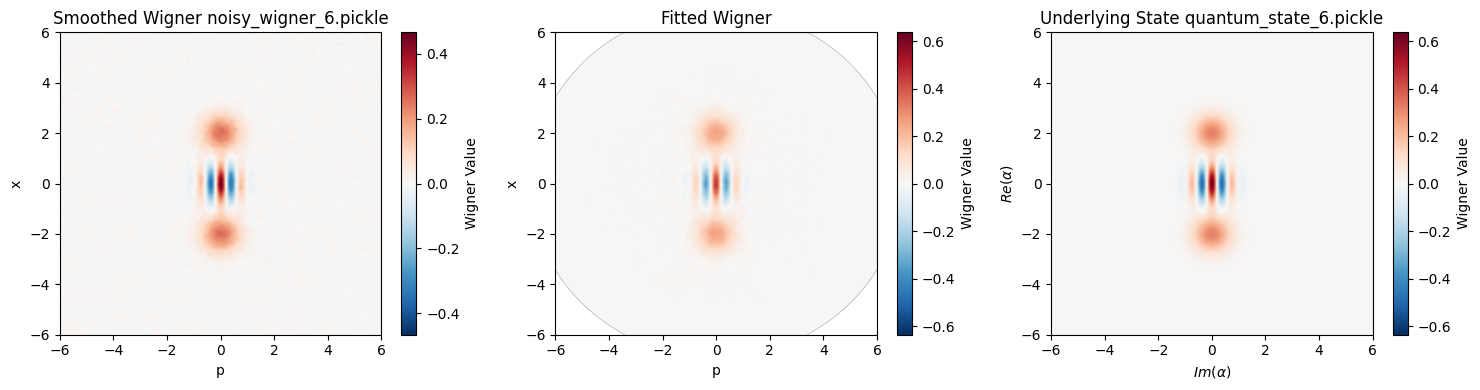

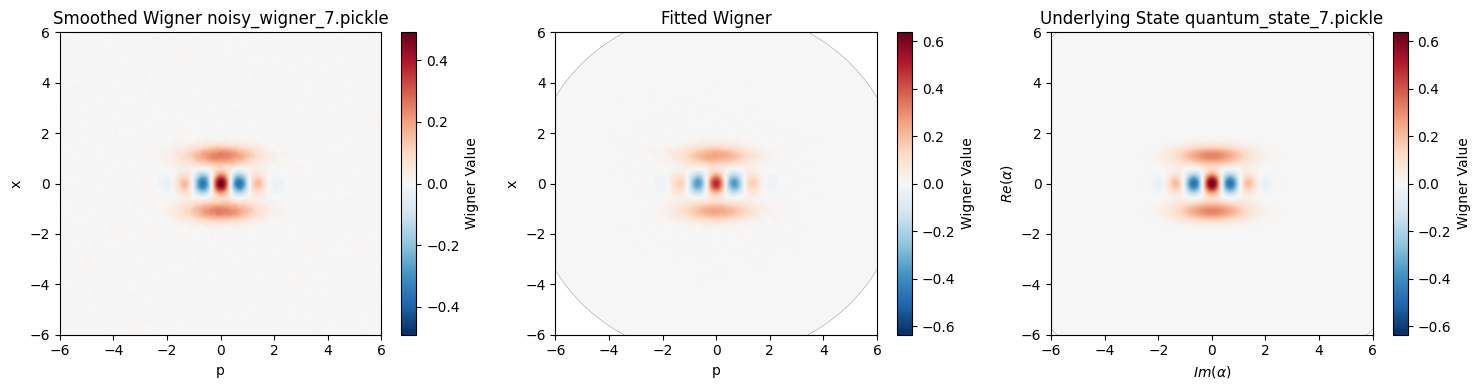

In [ ]:
num_samples = 200 # Was reduced to 200 because of run time but optimal is 1000
dim_povm = 50
dim_trunc=30

clean_rho_noisy = []
for i in range (8):
    clean_rho_noisy.append(rho(i, clean_dataset_noisy, num_samples, dim_povm, dim_trunc,idx_state=i,returnplot=True))


raw_rho_noisy = []
for i in range (8):
    raw_rho_noisy.append(rho(i, corrected_dataset_noisy, num_samples, dim_povm, dim_trunc,idx_state=i,returnplot=False))

In above plot we have on the far left the denoised data, in the middle we have the fitted wigner and the far right is the state without any noise. As input for the fit we used the denoised data

## Fidelity Analysis

In [18]:
def compareFidelity(rho_dataset, rho_ref):
    N = len(rho_dataset)
    fidelities = []
    for i in range(N):
        fidelities.append(dq.fidelity(rho_dataset[i],rho_ref[i]))
    return fidelities


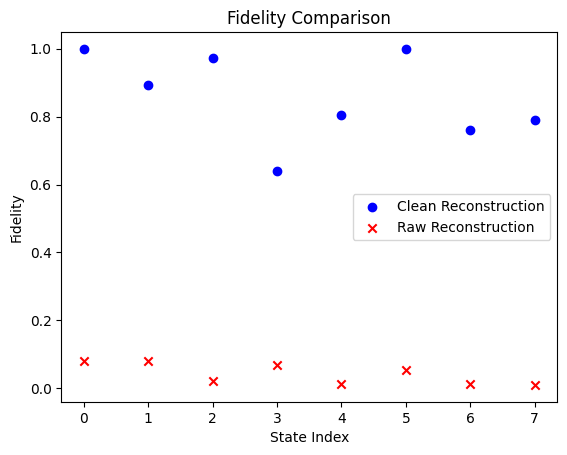

In [19]:
rho_ref = states

# Compute fidelities
F1 = np.array(compareFidelity(clean_rho_noisy, rho_ref))
F2 = np.array(compareFidelity(raw_rho_noisy, rho_ref))

# Plotting
plt.figure()
plt.scatter(np.arange(8), F1, label='Clean Reconstruction', marker='o', color='blue')
plt.scatter(np.arange(8), F2, label='Raw Reconstruction', marker='x', color='red')
plt.ylabel('Fidelity')
plt.xlabel('State Index')
plt.title('Fidelity Comparison')
plt.legend()
plt.grid(False)
plt.show()

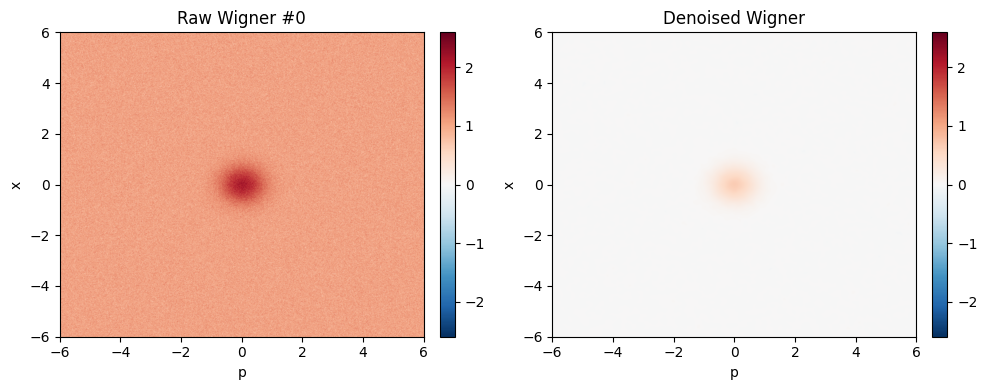

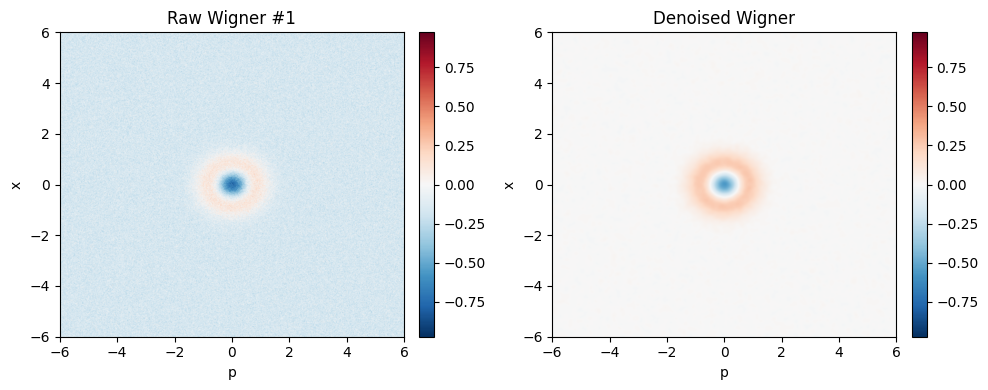

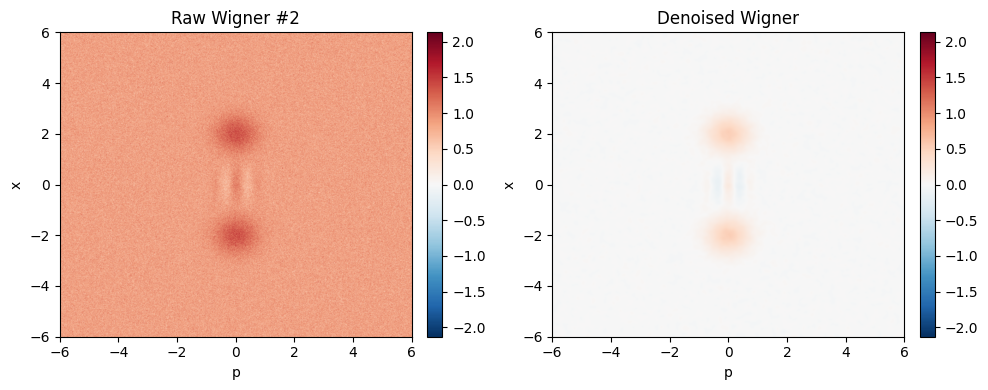

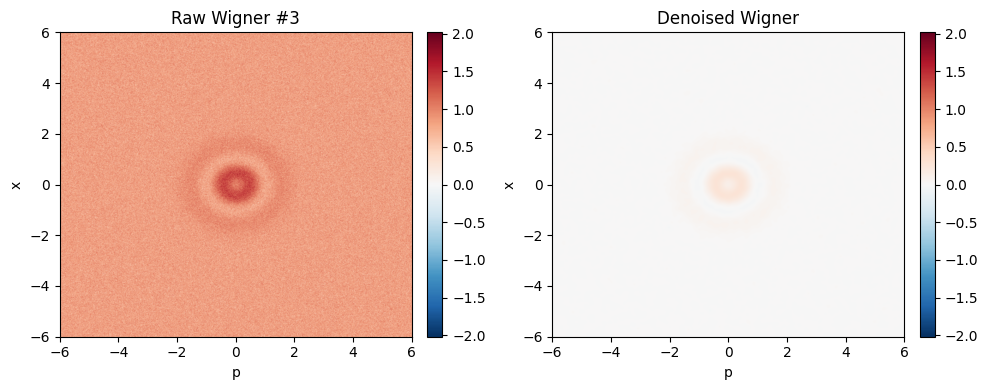

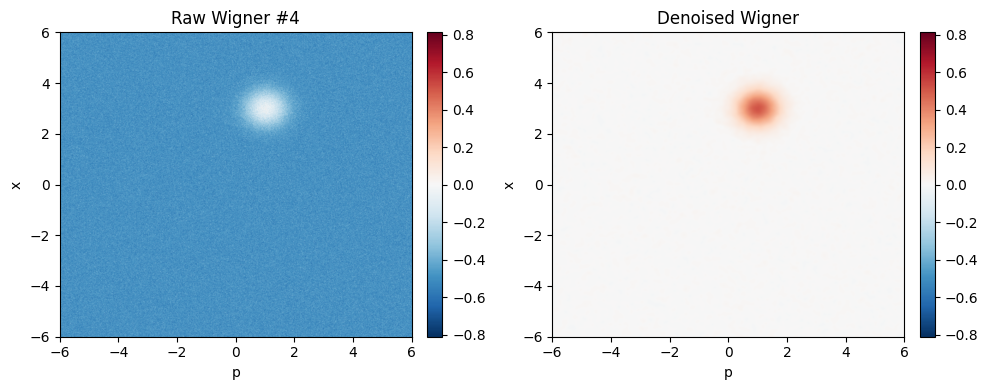

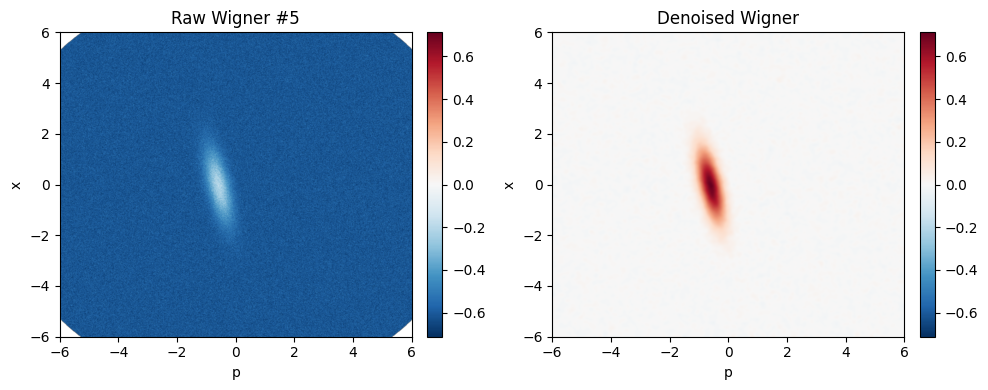

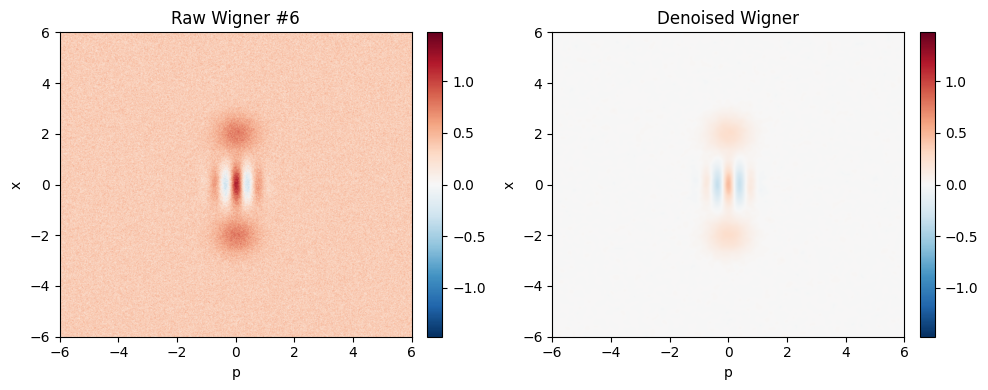

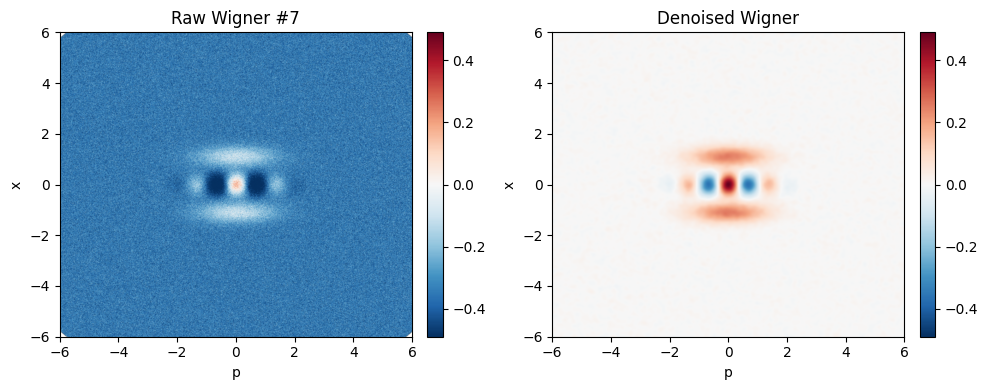

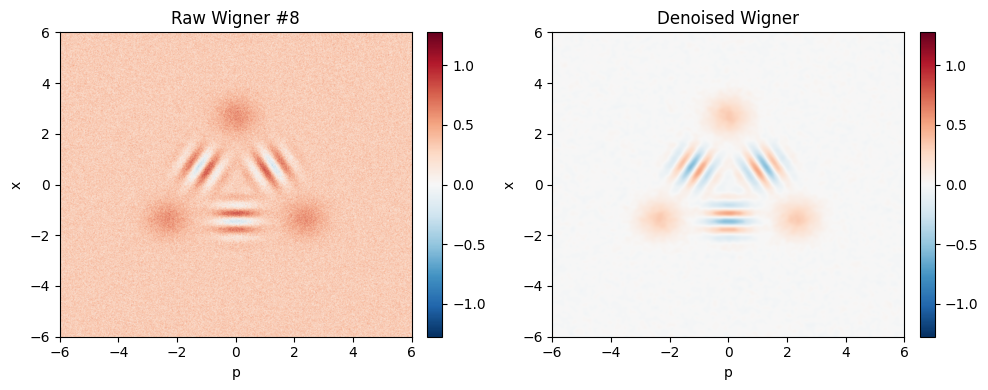

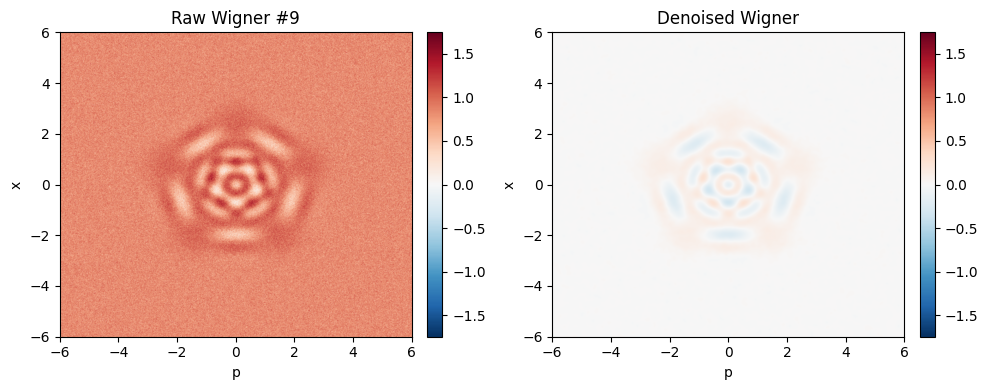

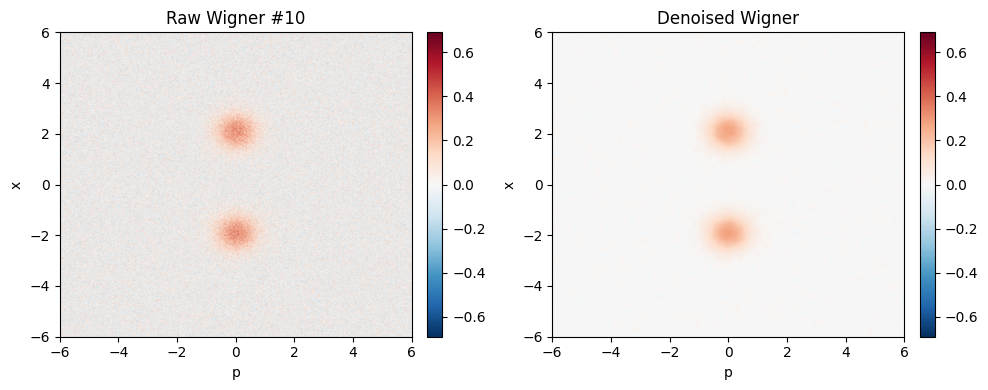

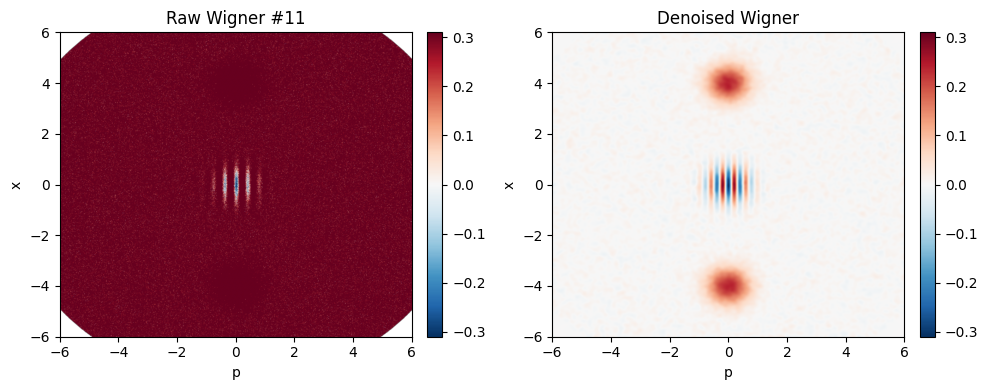

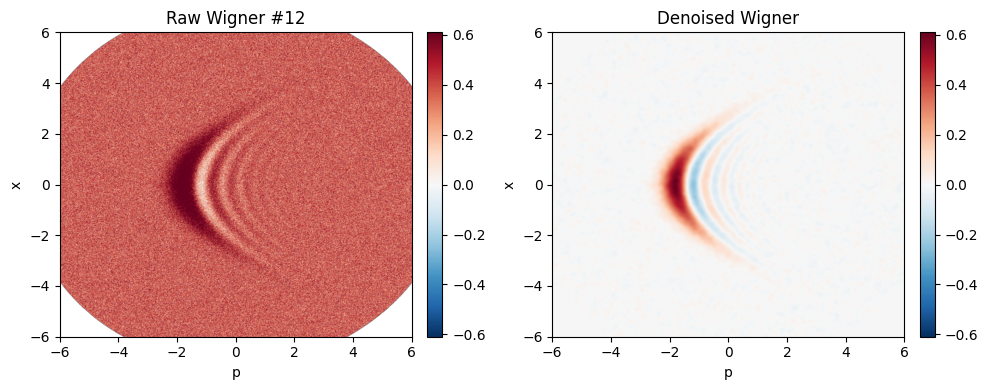

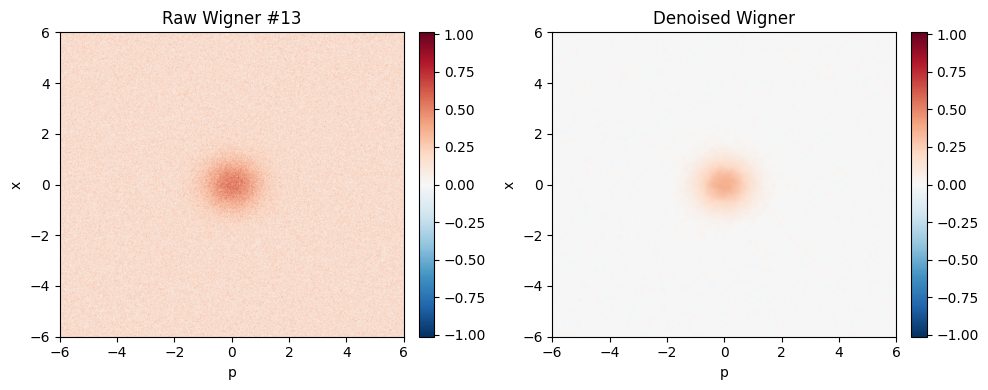

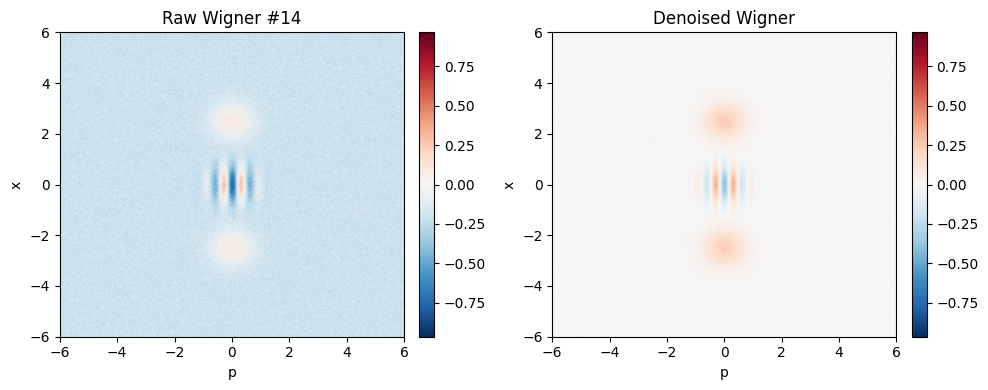

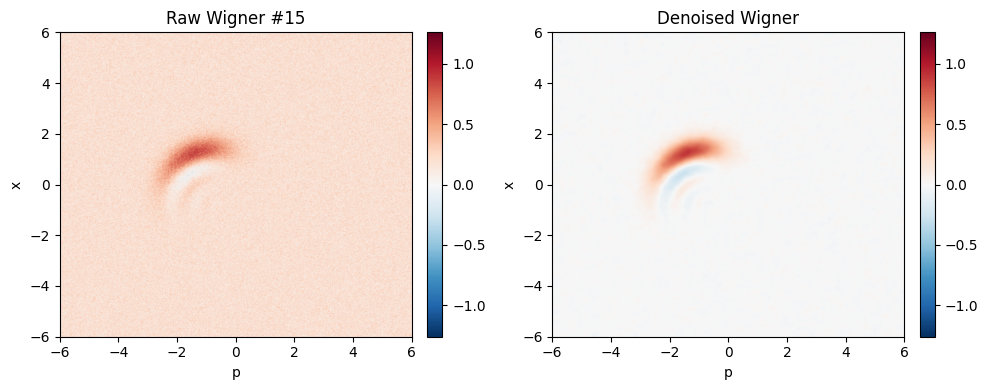

In [34]:
sigma = 5
dataset = data_objects_noisy

# ------------------------------------------------- denoising
clean_dataset_noisy = [
    denoise(i, dataset, sigma) for i in range(16)
]

# ------------------------------------------------- Plot‑Loop
for i in range(16):
    # roher und denoiseter Datensatz als Tripel
    X_raw,  Y_raw,  W_raw  = data_objects_noisy[i]
    X_den,  Y_den,  W_den  = clean_dataset_noisy[i]

    # komplexe Zahlen? -> nur Realteil anzeigen
    W_raw = np.real(W_raw)
    W_den = np.real(W_den)

    # gemeinsamer Farbbereich (symmetrisch um 0)
    vmax = np.nanmax([np.abs(W_raw).max(), np.abs(W_den).max()])

    extent_raw = [Y_raw.min(), Y_raw.max(), X_raw.min(), X_raw.max()]
    extent_den = [Y_den.min(), Y_den.max(), X_den.min(), X_den.max()]

    # ------------------------------------------------- 1×2‑Figure
    fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 4))

    # --- ax1 : Raw ---------------------------------------------
    im1 = ax1.imshow(
        W_raw, origin="lower", aspect="auto",
        extent=extent_raw, cmap="RdBu_r",
        vmin=-vmax, vmax=vmax, interpolation="bilinear"
    )
    ax1.set_title(f"Raw Wigner #{i}", pad=6)
    ax1.set_xlabel("p"); ax1.set_ylabel("x")
    fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

    # --- ax3 : Denoised ----------------------------------------
    im3 = ax3.imshow(
        W_den, origin="lower", aspect="auto",
        extent=extent_den, cmap="RdBu_r",
        vmin=-vmax, vmax=vmax, interpolation="bilinear"
    )
    ax3.set_title("Denoised Wigner", pad=6)
    ax3.set_xlabel("p"); ax3.set_ylabel("x")
    fig.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

# Sigma dependence

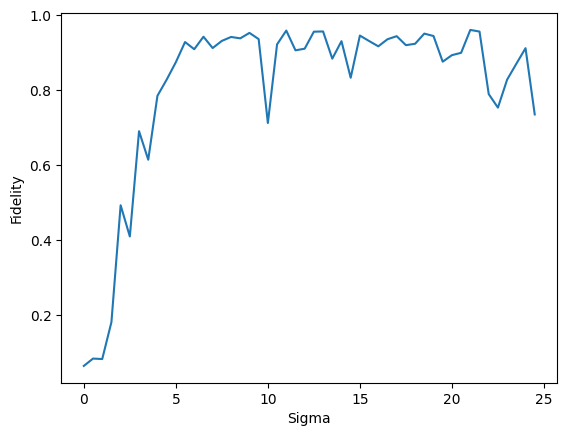

In [21]:
dataset = data_objects_noisy
num_samples = 100
dim_povm = 50
dim_trunc=30
sigma=5
i = 2 # change for the different states
Fs = []
for s in range (50):
    clean_dataset_noisy= [denoise(i, dataset, s/2)]
    clean_rho_noisy = rho(0, clean_dataset_noisy, num_samples, dim_povm, dim_trunc,i,returnplot=False)
    F = dq.fidelity(clean_rho_noisy,rho_ref[i])
    Fs.append(F)
    
plt.figure()
plt.plot(np.arange(50)/2,Fs)
plt.xlabel('Sigma')
plt.ylabel('Fidelity')
plt.show()

## Supervised Learning

In [44]:
# ==============================================================
# 0)  Imports
# ==============================================================

import numpy as np
import dynamiqs as dq
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# reproducibility
tf.random.set_seed(0);  np.random.seed(0)

train: (480, 128, 128, 1) val: (120, 128, 128, 1)


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_112 (Conv2D) │ (None, 128, 128,  │        160 │ input_layer_17[0… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_113 (Conv2D) │ (None, 128, 128,  │      2,320 │ conv2d_112[0][0]  │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_25    │ (None, 64, 64,    │          0 │ conv2d_113[0][0]  │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_114 (Conv2D) │ (None, 64, 64,    │      4,640 │ max_pooling2d_25… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_115 (Conv2D) │ (None, 64, 64,    │      9,248 │ conv2d_114[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_26    │ (None, 32, 32,    │          0 │ conv2d_115[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_116 (Conv2D) │ (None, 32, 32,    │     18,496 │ max_pooling2d_26… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_117 (Conv2D) │ (None, 32, 32,    │     36,928 │ conv2d_116[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_25    │ (None, 64, 64,    │          0 │ conv2d_117[0][0]  │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_118 (Conv2D) │ (None, 64, 64,    │     18,464 │ up_sampling2d_25… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_25 (Add)        │ (None, 64, 64,    │          0 │ conv2d_118[0][0], │
│                     │ 32)               │            │ conv2d_115[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_26    │ (None, 128, 128,  │          0 │ add_25[0][0]      │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_119 (Conv2D) │ (None, 128, 128,  │      4,624 │ up_sampling2d_26… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_26 (Add)        │ (None, 128, 128,  │          0 │ conv2d_119[0][0], │
│                     │ 16)               │            │ conv2d_113[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_120 (Conv2D) │ (None, 128, 128,  │        145 │ add_26[0][0]      │
│                     │ 1)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 95,025 (371.19 KB)

 Trainable params: 95,025 (371.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 647ms/step - loss: 0.0245 - val_loss: 0.0054
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 575ms/step - loss: 0.0050 - val_loss: 0.0032
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 586ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 536ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 615ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 593ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 562ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 750ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 621ms/step - loss: 0.0012 - val_loss: 0.0010
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


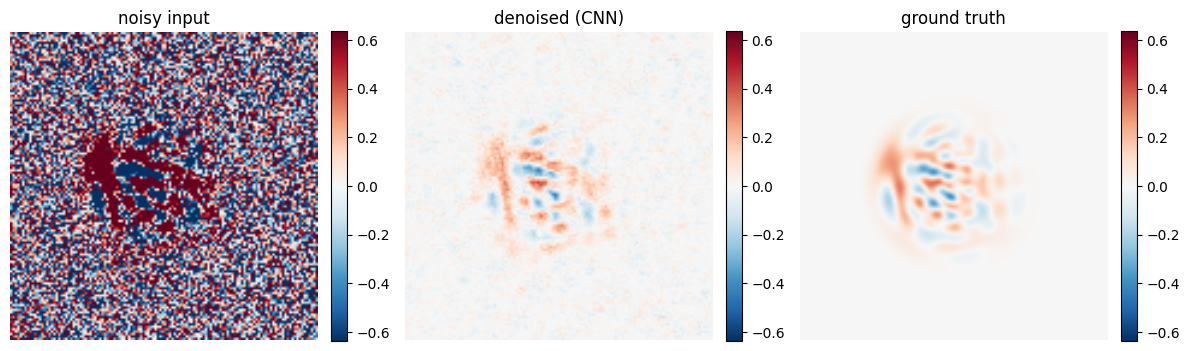

In [67]:
# ==============================================================
# 1) NOISE MODELS  –  “louder” settings
# ==============================================================

# ---------- master knobs ----------
A_RANGE   = (0.6, 1.4)      # scale
B_RANGE   = (-0.4, 0.4)     # offset
SIG_RANGE = (0.03, 0.15)    # Gaussian σ
SP_PROB   = 0.009           # salt & pepper probability
# ----------------------------------

def add_affine_noise(W):
    a = np.random.uniform(*A_RANGE)
    b = np.random.uniform(*B_RANGE)
    return a * W + b

def add_gaussian_noise(W):
    sigma = np.random.uniform(*SIG_RANGE)
    return W + np.random.normal(0, sigma, W.shape)

def add_salt_pepper(W):
    mask = np.random.choice([0, 1, 2], size=W.shape,
                            p=[1-2*SP_PROB, SP_PROB, SP_PROB])
    maxv = np.max(np.abs(W))
    return np.where(mask == 1,  maxv,
           np.where(mask == 2, -maxv, W))

def noisy_Wigner(W):
    Wn = add_affine_noise(np.array(W, copy=True))   # ensure mutable NumPy
    Wn = add_gaussian_noise(Wn)
    Wn = add_salt_pepper(Wn)
    # quick pre‑whitening: centre & scale
    return (Wn - np.median(Wn)) / np.mean(np.abs(Wn))

# ==============================================================
# 2) DATASET  (unchanged except more noise above)
# ==============================================================

def random_state(dim=12):
    psi = np.random.randn(dim) + 1j*np.random.randn(dim)
    psi /= np.linalg.norm(psi)
    return np.outer(psi, psi.conj())

def build_dataset(n_samples=600, npixels=128):
    clean, noisy = [], []
    for _ in range(n_samples):
        rho = random_state()
        _, _, W_clean = dq.wigner(rho, npixels=npixels)
        W_noisy = noisy_Wigner(W_clean)
        clean.append(W_clean.astype("float32"))
        noisy.append(W_noisy.astype("float32"))
    clean = np.expand_dims(np.array(clean), -1)
    noisy = np.expand_dims(np.array(noisy), -1)
    return noisy, clean

noisy, clean = build_dataset()
x_train, x_val, y_train, y_val = train_test_split(
    noisy, clean, test_size=0.2, random_state=0)
print("train:", x_train.shape, "val:", x_val.shape)

# ==============================================================
# 3) small U‑Net in Keras
# ==============================================================

def UNet_small(input_shape):
    inp = layers.Input(shape=input_shape)

    # encoder
    c1 = layers.Conv2D(16, 3, padding="same", activation="relu")(inp)
    c1 = layers.Conv2D(16, 3, padding="same", activation="relu")(c1)
    p1 = layers.MaxPool2D()(c1)

    c2 = layers.Conv2D(32, 3, padding="same", activation="relu")(p1)
    c2 = layers.Conv2D(32, 3, padding="same", activation="relu")(c2)
    p2 = layers.MaxPool2D()(c2)

    # bottleneck
    b = layers.Conv2D(64, 3, padding="same", activation="relu")(p2)
    b = layers.Conv2D(64, 3, padding="same", activation="relu")(b)

    # decoder
    u2 = layers.UpSampling2D()(b)
    u2 = layers.Conv2D(32, 3, padding="same", activation="relu")(u2)
    u2 = layers.Add()([u2, c2])

    u1 = layers.UpSampling2D()(u2)
    u1 = layers.Conv2D(16, 3, padding="same", activation="relu")(u1)
    u1 = layers.Add()([u1, c1])

    out = layers.Conv2D(1, 3, padding="same", activation="linear")(u1)

    return models.Model(inp, out)

model = UNet_small(x_train.shape[1:])
model.compile(optimizer="adam", loss="mse")
model.summary()

# ==============================================================
# 4) training
# ==============================================================

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=10, batch_size=16
)

# ==============================================================
# 5) qualitative example
# ==============================================================

idx = np.random.randint(len(x_val))
noisy_ex  = x_val[idx, ..., 0]
clean_ex  = y_val[idx, ..., 0]
deno_ex   = model.predict(x_val[idx:idx+1])[0, ..., 0]

vlim = 2/np.pi
titles = ["noisy input", "denoised (CNN)", "ground truth"]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, W, ttl in zip(axes, [noisy_ex, deno_ex, clean_ex], titles):
    im = ax.imshow(W, cmap="RdBu_r", vmin=-vlim, vmax=vlim,
                   origin="lower", interpolation="bilinear")
    ax.set_title(ttl); ax.set_axis_off()
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout(); plt.show()

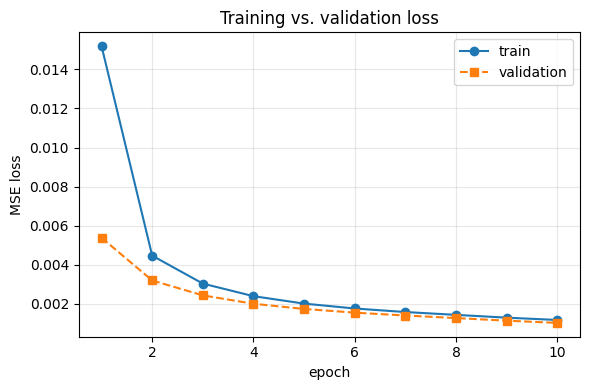

In [68]:
# history comes from model.fit(...)
train_loss = history.history["loss"]
val_loss   = history.history.get("val_loss")

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, train_loss, "o-", label="train")
if val_loss is not None:
    plt.plot(epochs, val_loss, "s--", label="validation")
plt.xlabel("epoch")
plt.ylabel("MSE loss")
plt.title("Training vs. validation loss")
plt.grid(alpha=.3)
plt.legend()
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

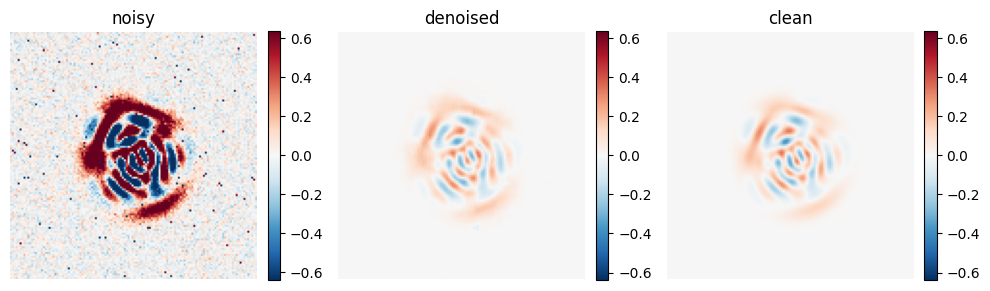

In [58]:
# =====================================================================
# 5) evaluate fidelity before / after denoising  on the val set
# =====================================================================
def fit_density_matrix(W):
    """YOUR existing tomography routine – replace with real code."""
    # placeholder: just return identity/dim
    dim = 12
    return np.eye(dim)/dim

F_raw, F_deno = [], []

for Wn, Wc, rho_true in zip(x_val[...,0], y_val[...,0], rhos_val):
    rho_raw  = fit_density_matrix(Wn)
    rho_deno = fit_density_matrix(model.predict(Wn[None,...,None])[0,...,0])
    F_raw.append(dq.fidelity(rho_raw,  rho_true))
    F_deno.append(dq.fidelity(rho_deno, rho_true))

F_raw, F_deno = np.array(F_raw), np.array(F_deno)
print("mean fidelity raw :",  F_raw.mean())
print("mean fidelity deno:",  F_deno.mean(),
      " (Δ =", (F_deno-F_raw).mean(), ")")

# =====================================================================
# 6) visual example
# =====================================================================
idx = np.random.randint(len(x_val))
noisy_ex  = x_val[idx,...,0]
clean_ex  = y_val[idx,...,0]
deno_ex   = model.predict(x_val[idx:idx+1])[0,...,0]

vlim = 2/np.pi
titles = ["noisy", "denoised", "clean"]

fig, ax = plt.subplots(1,3,figsize=(10,3))
for a, W, t in zip(ax,[noisy_ex, deno_ex, clean_ex],titles):
    im=a.imshow(W, cmap="RdBu_r",vmin=-vlim,vmax=vlim,origin="lower")
    a.set_title(t); a.axis("off"); fig.colorbar(im, ax=a,fraction=.046,pad=.04)
plt.tight_layout(); plt.show()